In [1]:
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch
import numpy as np
from matplotlib.colors import to_rgba
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Spain vs Poland
MATCH_ID = 3788762
TEAM = 'Poland'
parser = Sbopen()
events, related, freeze, players = parser.event(MATCH_ID)

In [3]:
events

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_offensive,foul_committed_advantage,foul_won_advantage,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_penalty,foul_won_penalty,shot_one_on_one,shot_deflected
0,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,1,1,00:00:00,0,0,1,0.000000,3788762,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22879fa4-de28-4a99-97f6-8078fb4dc927,2,1,00:00:00,0,0,1,0.000000,3788762,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3729d2d7-b171-4b5d-99f5-e66118b4eb8c,3,1,00:00:00,0,0,1,0.000000,3788762,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52bb380b-bd29-47e5-9d97-8e20e2cbd452,4,1,00:00:00,0,0,1,0.000000,3788762,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45b27e4b-eae8-4c74-8ac1-d8cd1b53e0bb,5,1,00:00:00.040000,0,0,2,0.927143,3788762,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,c850fa45-7f83-4397-a0ea-8d7b2613fb1b,3649,2,00:49:52.262000,94,52,164,1.881383,3788762,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3649,2bae919f-6add-4f3d-969c-f2e7000a3d9e,3650,2,00:49:54.143000,94,54,164,1.805859,3788762,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3650,da8c9a46-d769-4861-88f0-37ddaf11983e,3651,2,00:49:55.949000,94,55,164,NaN,3788762,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3651,f716c412-dfb8-4704-a95f-4bc7d9493292,3652,2,00:49:58.304000,94,58,164,0.000000,3788762,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pressures = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pressure')]
pressures_3 = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pressure') & (events.x >= 85)]

In [5]:
print(len(pressures))
print(len(pressures_3))

246
32


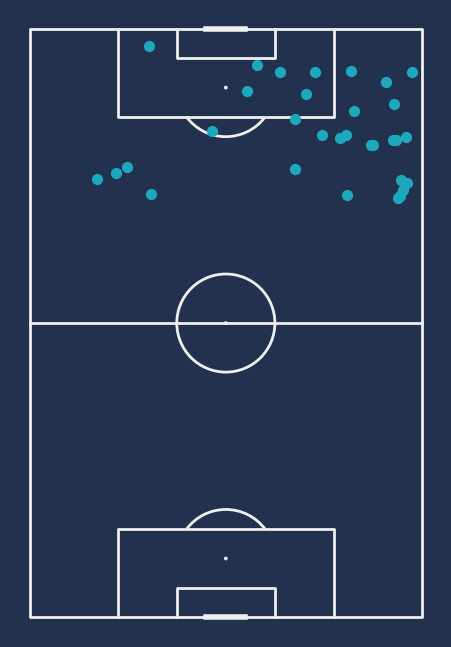

In [6]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22314E', line_color='#efefef')
fig, ax = pitch.draw(figsize=(4.4, 6.4), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22314E")


pass_nodes = pitch.scatter(pressures_3.x, pressures_3.y,
                           s=50,
                           color='#1EA8BD', edgecolors='#1EA8BD', linewidth=1, alpha=1, ax=ax)
